In [236]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.pyplot as plt

UsageError: Line magic function `%matplotlib.pyplot` not found.


In [185]:
os.chdir(r"E:\003 IBM CE\3. Artificial Intelligence\Mody\Linear Regression")

In [186]:
data=pd.read_csv("regression.csv")

In [187]:
data.head()

,x1,x2,y
0,-0.635764,0.241162,-32.718033
1,0.644243,0.425391,59.923622
2,-0.407295,0.865839,7.470409
3,-0.551043,1.673688,30.181461
4,1.354318,-0.459583,71.860641


# Simple LR

In [188]:
x=data[['x1']]

In [189]:
y=data.y

In [190]:
data.shape

(1000, 3)

In [191]:
import sklearn.model_selection as model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.20,random_state=200)

In [192]:
x_train.shape

(800, 1)

In [193]:
x_test.shape

(200, 1)

In [194]:
import sklearn.linear_model as linear_model

In [195]:
reg=linear_model.LinearRegression(fit_intercept=True)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [196]:
reg.intercept_

-0.30711365847980754

In [197]:
reg.coef_

array([64.38127644])

In [198]:
y_pred=reg.predict(x_test)

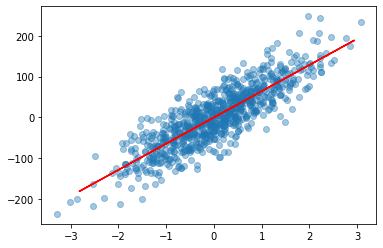

In [199]:
plt.scatter(x_train,y_train,alpha=0.4)
plt.plot(x_test,y_pred,color='red',alpha=1)

In [200]:
reg.predict([[2]])

array([128.45543923])

In [201]:
sum((y_test-reg.predict(x_test))**2)

252700.63155048445

# Multinomial Regression

In [202]:
x=data.drop("y",axis=1)

In [203]:
y=data.y

In [204]:
x.head()

,x1,x2
0,-0.635764,0.241162
1,0.644243,0.425391
2,-0.407295,0.865839
3,-0.551043,1.673688
4,1.354318,-0.459583


In [205]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.20,random_state=200)

In [206]:
reg2=linear_model.LinearRegression(fit_intercept=True)
reg2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [207]:
reg2.intercept_

3.934630399271555e-13

In [208]:
reg2.coef_

array([66.62336171, 39.96791569])

In [209]:
reg2.predict([[1,2]])

array([146.55919309])

In [210]:
data=pd.read_csv("Advertising.csv")

In [211]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [212]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [213]:
x=data[['TV', 'Radio', 'Newspaper']]

In [219]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [215]:
y=data.Sales

In [216]:
model1=linear_model.LinearRegression(fit_intercept=True)

In [218]:
model2=linear_model.LinearRegression(fit_intercept=True)
model3=linear_model.LinearRegression(fit_intercept=True)

In [220]:
model1.fit(x[['TV']],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [221]:
model2.fit(x[['TV','Radio']],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [222]:
model3.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [237]:
rss=[]
rss.append(sum((y-model1.predict(x[['TV']]))**2))
rss.append(sum((y-model2.predict(x[['TV','Radio']]))**2))
rss.append(sum((y-model3.predict(x))**2))

In [238]:
rss

[2102.530583131351, 556.913980067618, 556.8252629021869]

In [244]:
loss=pd.DataFrame(rss,index=['one variable','two variable','three varaible'])

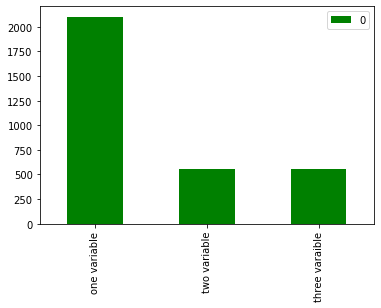

In [247]:
loss.plot.bar(color='green');